In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# URL of the dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Load the dataset
df = pd.read_csv(url)


In [25]:
# Display the first few rows of the dataframe
print(df.head())

# Basic information about the dataset
print(df.info())

# Descriptive statistics for the dataset
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

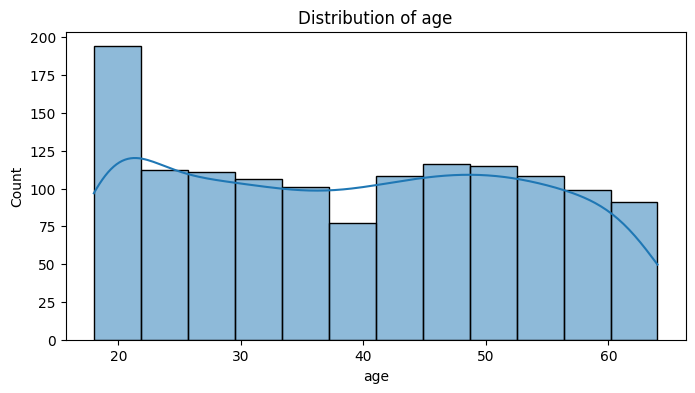

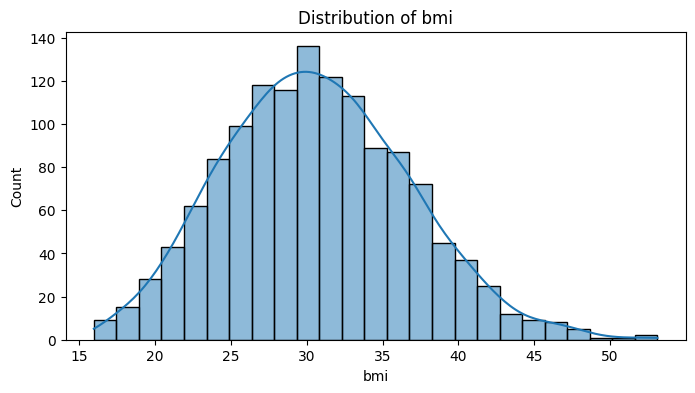

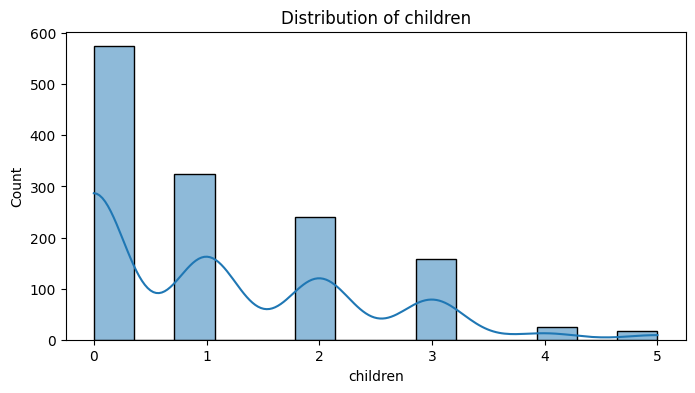

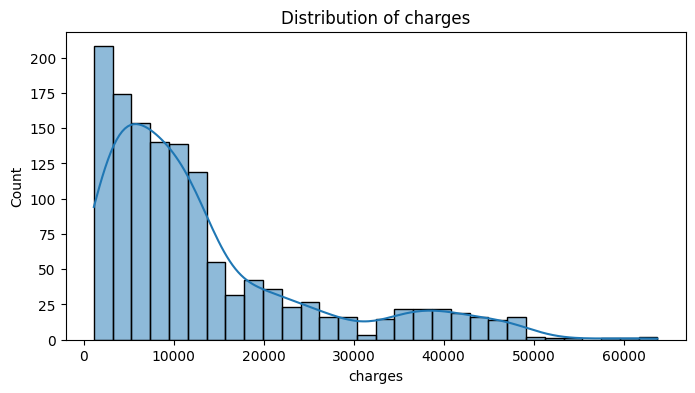

In [26]:
# 1. Distribution of numerical variables
num_vars = ['age', 'bmi', 'children', 'charges']
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

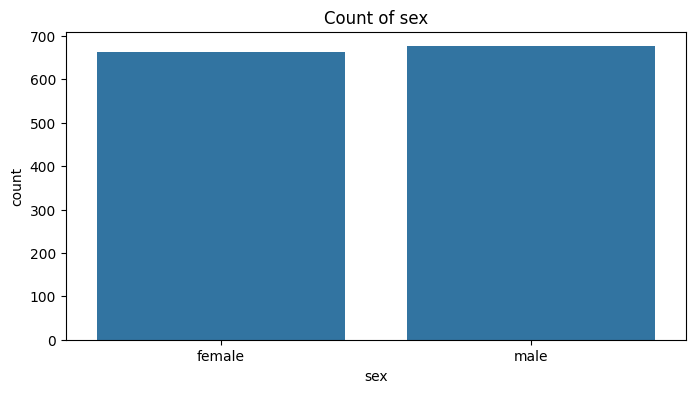

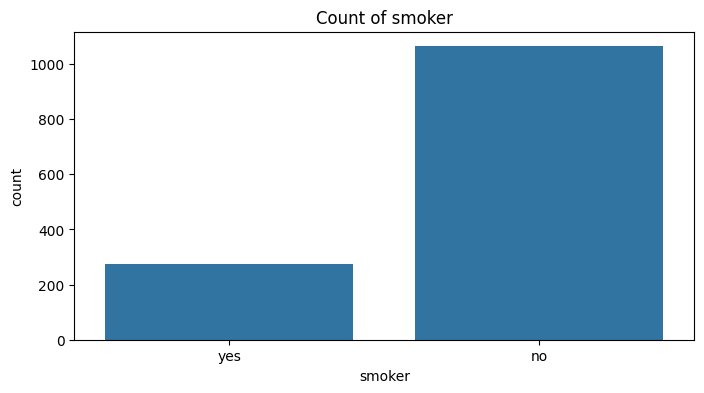

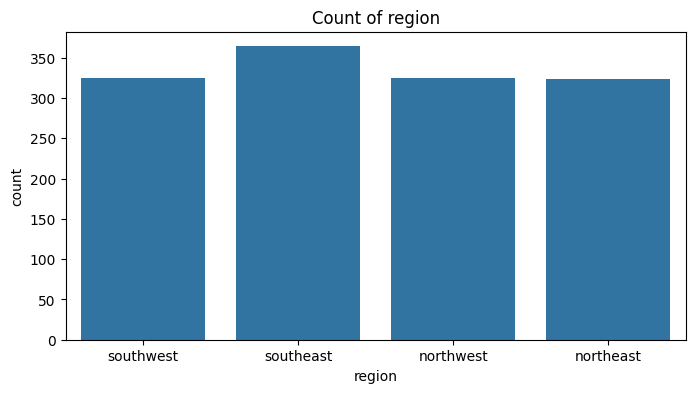

In [27]:
# 2. Count plots for categorical variables
cat_vars = ['sex', 'smoker', 'region']
for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.show()

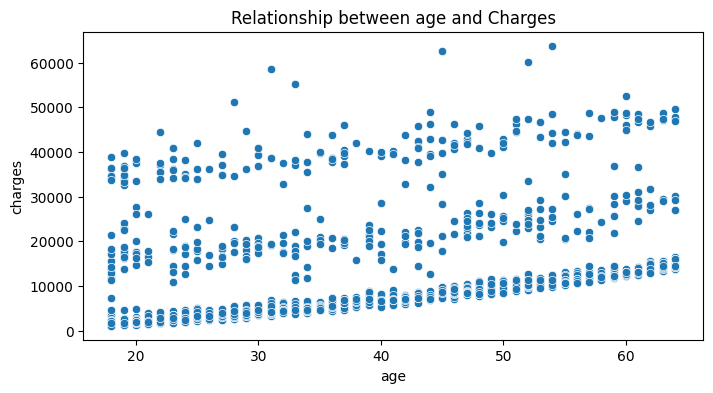

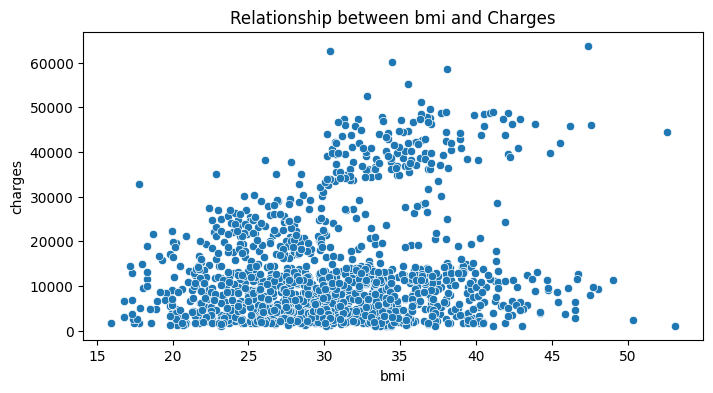

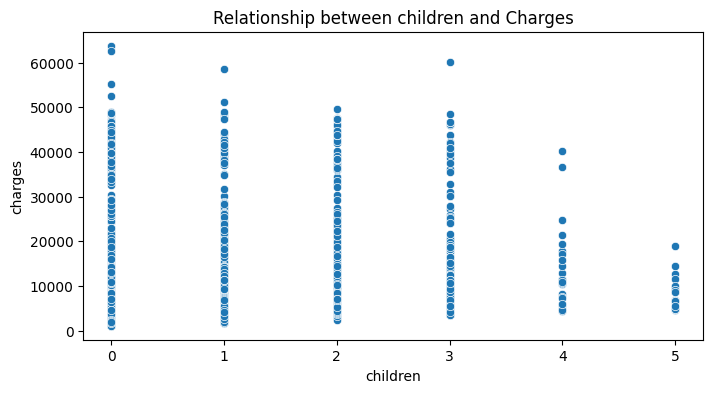

In [28]:
# 3. Relationship between numerical variables and charges
for col in num_vars[:-1]:  # excluding 'charges' itself
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df['charges'])
    plt.title(f'Relationship between {col} and Charges')
    plt.show()

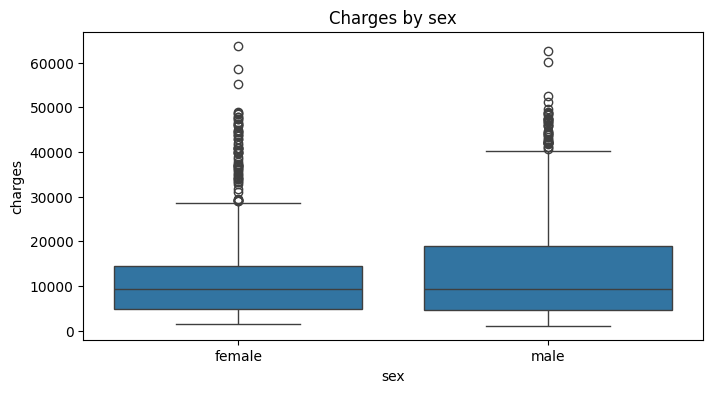

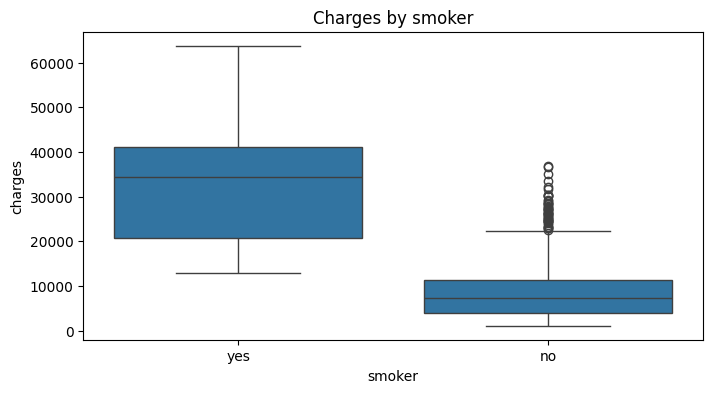

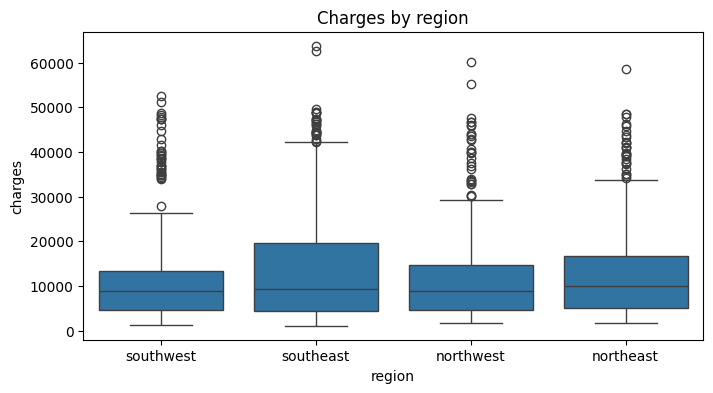

In [29]:
# 4. Relationship between categorical variables and charges
for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], y=df['charges'])
    plt.title(f'Charges by {col}')
    plt.show()

In [30]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Splitting the data into features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model with the training data
lin_reg.fit(X_train, y_train)


LinearRegression()

In [32]:
# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724


In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Scale features (optional but recommended for linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate polynomial features (optional)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the Linear Regression model
lin_reg_optimized = LinearRegression()

# Fit the model with the training data
lin_reg_optimized.fit(X_train, y_train)


LinearRegression()

In [37]:
# Predict on the test data
y_pred_optimized = lin_reg_optimized.predict(X_test)

# Calculate Mean Absolute Error
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Calculate the performance metrics
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mse_optimized**0.5
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R-squared: {r2_optimized}")
print(f"Optimized Mean Absolute Error: {mae_optimized}")
print(f"Optimized Root Mean Squared Error: {rmse_optimized}")


Optimized Mean Squared Error: 20714448.090271644
Optimized R-squared: 0.8665725130812467
Optimized Mean Absolute Error: 2730.051911003731
Optimized Root Mean Squared Error: 4551.3127875670825
